In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

In [2]:
serial_dir = 'serial_grids'

grids = {}
all_h = {}
all_v1 = {}
all_v2 = {}

for f in os.listdir(serial_dir):
    # Remove trailing '.np' and leading 'step_'
    timestep = int(f.replace('.npy', '').replace('step_', ''))
    grid = np.load(f'{serial_dir}/{f}')

    grids[timestep] = grid
    all_h[timestep] = grid[:, :, 0]
    all_v1[timestep] = grid[:, :, 1]
    all_v2[timestep] = grid[:, :, 2]

timesteps = sorted(list(grids.keys()))

In [3]:
min_h = min([h.min() for h in all_h.values()])
max_h = max([h.max() for h in all_h.values()])

In [4]:
# Needed to apply the same color scale to all frames.
min_v1 = min([v.min() for v in all_v1.values()])
max_v1 = max([v.max() for v in all_v1.values()])

min_v2 = min([v.min() for v in all_v2.values()])
max_v2 = max([v.max() for v in all_v2.values()])

min_v = min(min_v1, min_v2)
max_v = max(max_v1, max_v2)

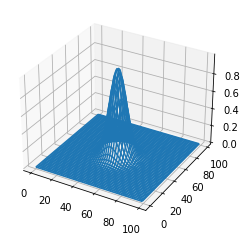

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

h = grids[1][:, :, 0]
x, y = np.meshgrid(np.arange(h.shape[0]), np.arange(h.shape[1]))
res = ax.plot_wireframe(x, y, h)

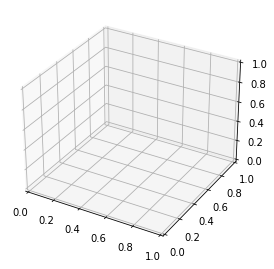

In [6]:
fig = plt.figure(figsize=(8, 4.5))
ax = fig.add_subplot(projection='3d')

x, y = np.meshgrid(np.arange(h.shape[0]), np.arange(h.shape[1]))

def animate_h(frame):
    h = grids[frame][:, :, 0]
    ax.clear()
    ax.set_zlim([min_h, max_h])
    res = ax.plot_wireframe(x, y, h)
    
    if (frame-1) % 100 == 0:
        print(frame)
        
    return res

anim = FuncAnimation(fig, animate_h, frames=timesteps)

In [7]:
anim.save('python_anim.mp4')

1
1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
2801
2901
3001
3101
3201
3301
3401
3501
3601
3701
3801
3901
4001
4101
4201
4301
4401
4501
4601
4701
4801
4901
